In [70]:
import pandas as pd
import numpy as np
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.layers.convolutional import MaxPooling2D
from keras.datasets import mnist
import random
import matplotlib.pyplot as plt

In [3]:
#prepare data
(train_features,train_labels), (test_features, test_labels) = mnist.load_data()
train_feat = train_features.reshape(60000, 28, 28, 1)
test_feat = test_features.reshape(10000, 28, 28, 1)
train_lab = to_categorical(train_labels)
test_lab = to_categorical(test_labels)

11493376/11490434 [==============================] - 0s 0us/step


In [73]:
mod = Sequential()
mod.add(Conv2D(64, kernel_size = (3,3), activation ='relu', strides = (1,1)))
mod.add(MaxPooling2D(pool_size = (2, 2), strides = (2,2)))
mod.add(Conv2D(64, kernel_size = (5,5), activation ='relu', strides = (1,1)))
mod.add(MaxPooling2D(pool_size = (2, 2), strides = (2,2)))
mod.add(Flatten())
mod.add(Dense(1024, activation='relu'))
mod.add(Dense(10, activation='softmax'))
mod.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adagrad(0.01), metrics=['accuracy'])
print('Training-------------------------------------------------')
mod.fit(train_feat, train_lab,epochs = 1)
print('Evaluationg----------------------------------------------')
s = mod.evaluate(test_feat, test_lab)
print("The accuracy for MNIST Test data(%) : ", s[1]*100)

Training-------------------------------------------------
Epoch 1/1
60000/60000 [==============================] - 59s 989us/step - loss: 1.8982 - accuracy: 0.9406
Evaluationg----------------------------------------------
10000/10000 [==============================] - 3s 257us/step
The accuracy for MNIST Test data(%) :  97.45000004768372


In [90]:
from keras.datasets import cifar100 ## dataset is not downloading

In [86]:
from keras.datasets import cifar100
(ctrain_features, ctrain_label), (ctest_features, ctest_label) = cifar100.load_data()
ctrain_labels = keras.utils.to_categorical(ctrain_label)
ctest_labels = keras.utils.to_categorical(ctest_label)
LABEL = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

In [88]:
model = Sequential()
model.add(Conv2D(64, kernel_size = (3,3), activation ='relu', strides = (1,1)))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2,2)))
model.add(Conv2D(64, kernel_size = (5,5), activation ='relu', strides = (1,1)))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2,2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(100, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.SGD(lr=0.01), metrics=['accuracy'])
print('Training-------------------------------------------------------')
model.fit(ctrain_features, ctrain_labels)
print('Evaluating-----------------------------------------------------')
s = model.evaluate(ctest_features, ctest_labels)
print('The accuracy for CIFAR-100 test dataset(%) : ', s[1]*100)

Training-------------------------------------------------------
Epoch 1/1
50000/50000 [==============================] - 62s 1ms/step - loss: nan - accuracy: 0.0100
Evaluating-----------------------------------------------------
10000/10000 [==============================] - 4s 408us/step
The accuracy for CIFAR-100 test dataset(%) :  0.9999999776482582


In [66]:
predict_cifar = model.predict(ctest_features)

In [15]:
predict_mnist = mod.predict(test_feat)

In [30]:
print (predict_mnist.shape)

(10000, 10)


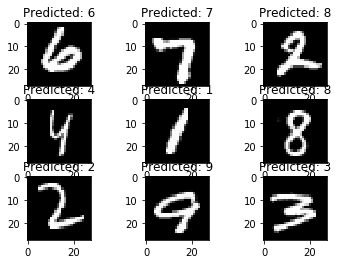

In [35]:
index = [random.randint(0,10000) for i in range(9)]
#print (index)
for i in range(len(index)):
  plt.subplot(3,3,i+1)
  img=np.matrix(test_feat[index[i]])
  img=img.reshape((28,28))
  plt.imshow(img,cmap='gray')
  #plt.title('Predicted: ' + str(np.argmax(mod.predict(test_feat[index[i]]))))
  #print (index)
  #print (index[i])
  plt.title('Predicted: ' + str(np.argmax(predict_mnist[index[i]])))

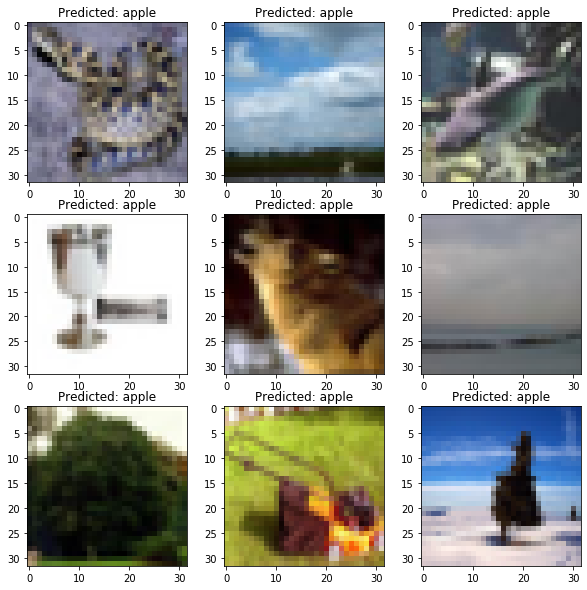

In [43]:
#predict on cipher data
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  img=ctest_features[index[i]]
  plt.imshow(img,cmap='gray')
  #plt.title('Predicted: ' + str(LABEL[np.argmax(predict_cifar[index[i]])]))
  plt.title('Predicted: ' + str(LABEL[np.argmax(predict_cifar[index[i]])]))

FOR MNIST DATA
The filters  for 0  convo layer are : 
------------------------------------------------


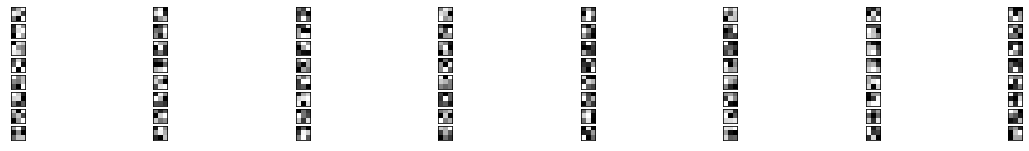

The filters  for 1  convo layer are : 
------------------------------------------------


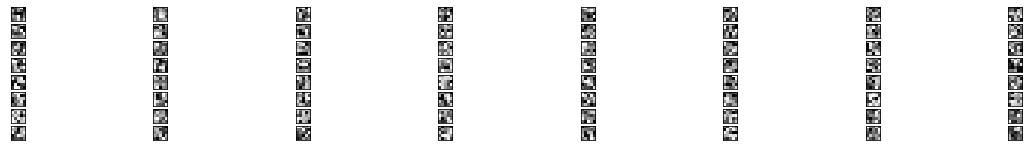

In [61]:
f = []
for layer in mod.layers:
  if 'conv' in layer.name:
    filters = layer.get_weights()[0]
    f.append(filters)
print('FOR MNIST DATA')
for i in range(len(f)):
  print('The filters  for ' + str(i) + '  convo layer are : ')
  print('------------------------------------------------')
  filter_size = f[i].shape[-1]
  ix = 1
  plt.figure(figsize=(20,20))
  for j in range(filter_size):
    fil = f[i][:,:,:,j]
    for k in range(1):
      ax = plt.subplot(filter_size, 8, ix)
      ax.set_xticks([])
      ax.set_yticks([])
      plt.imshow(fil[:,:,k], cmap='gray')
      ix = ix + 1
  plt.show()

        
    


The feature map for layer 1
----------------------------------------------------------------------------------------------------


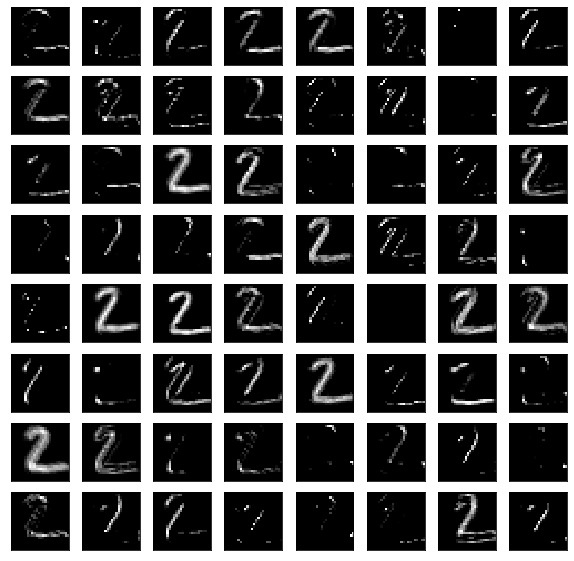

The feature map for layer 2
----------------------------------------------------------------------------------------------------


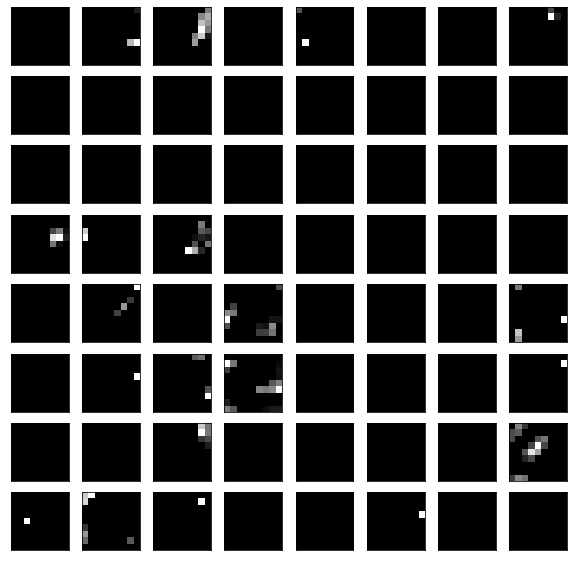

In [89]:
from keras.models import Model
ixs = [0,2]
outputs = [mod.layers[i].output for i in ixs]
model = Model(inputs=mod.inputs, outputs=outputs)
image = test_features[i].reshape(1,28,28,1)
cmap = model.predict(image)
i = 1
for fmap in cmap:
  print('The feature map for layer ' +str(i))
  print('-'*100)
  x = 1
  plt.figure(figsize=(10,10))
  for _ in range(8):
    for _ in range(8):
      
      ax = plt.subplot(8, 8, x)
      ax.set_xticks([])
      ax.set_yticks([])
      plt.imshow(fmap[0, :, :, x-1], cmap='gray')
      x = x + 1
  i = i + 1
  plt.show()